### Simulation

In [1]:
from bmc.simulate import simulate
import numpy as np
import torch
import matplotlib.pyplot as plt

In [7]:
low = -20e-6
high = 20e-6

n_iso = 10

z_pos = np.linspace(low, high, n_iso)
z_pos = torch.tensor(z_pos)
z_pos = torch.cat((z_pos, torch.tensor([0.0])))  # Füge 0 hinzu

In [8]:
seq_path_gauss = 'seq_lib/10_ETM.seq'
config_path = 'sim_lib/config_1pool.yaml'

adc_time = 12e-3
retun_zmag = False
show_plot = False
n_backlog = 3
webhook = False
plt_range = [0, 4]
iso_select = [-5,0,5]

In [9]:
sim = simulate(config_file=config_path, 
                   seq_file=seq_path_gauss, 
                   adc_time=adc_time,
                   z_positions=z_pos,
                   return_zmag=retun_zmag,
                   iso_select=iso_select,
                   show_plot=show_plot,
                   n_backlog=n_backlog,
                   webhook=webhook,
                   plt_range=plt_range)  # simulation mac

BMCTool simulation: 100%|██████████| 23/23 [00:02<00:00,  9.34it/s]

['rf at 0.0000s', 'rf at 0.0800s', 'gz at 0.0820s', 'adc at 0.0825s']


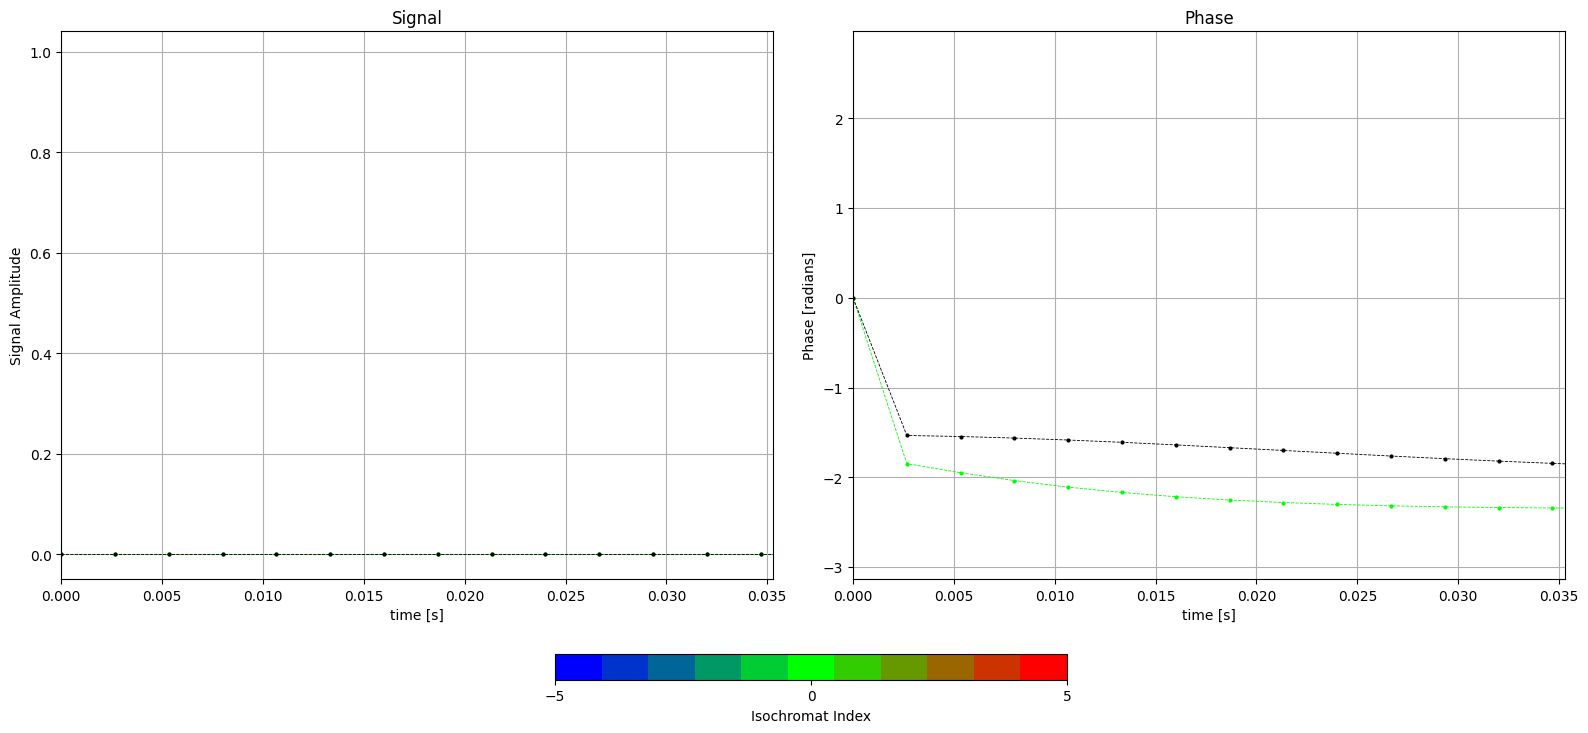

In [10]:
from bmc.utils.eval import plot_sim
time, m_z, m_z_total, m_c, m_c_total = sim.get_mag(return_cest_pool=False)
time = time.cpu().numpy()
m_z = m_z.cpu().numpy()
m_z_total = m_z_total.cpu().numpy()
m_c = m_c.cpu().numpy()
m_c_total = m_c_total.cpu().numpy()

iso_select = [0]
plt_range = [0.0, 0.0353] #1ETM
# plt_range = [0.0675, 0.074] #5ETM
# plt_range = [0.1250, 0.141] #10ETM
# plt_range = [0.0675, 0.09]
# plt_range = [0.08, 0.1]

# _ = plot_sim(m_out=[m_z, m_z_total], time=time., plt_range=plt_range, iso_select=iso_select)
_ = plot_sim(m_out=[m_c, m_c_total], time=time, plt_range=plt_range, iso_select=iso_select)

m_trans_plus = np.abs(m_c_total)[-900:]
m_z_plus = m_z_total


### Animation

In [11]:
run_time = .1
track_path = True
ie = False
timing = False
total_mag = False
animate_cest = False
kwargs = {'quality': '-ql', 'write': '--write_to_movie'}  #--write_to_movie

In [12]:
# sim.animate(run_time=run_time, 
#             track_path=track_path, 
#             ie=ie, 
#             timing=timing,
#             total_mag=total_mag,
#             animate_cest=animate_cest,
#             **kwargs)

In [13]:
seq_path_gauss = 'seq_lib/10_ETM_minus.seq'

In [14]:
sim_minus = simulate(config_file=config_path, 
                   seq_file=seq_path_gauss, 
                   adc_time=adc_time,
                   z_positions=z_pos,
                   return_zmag=retun_zmag,
                   iso_select=iso_select,
                   show_plot=show_plot,
                   n_backlog=n_backlog,
                   webhook=webhook,
                   plt_range=plt_range)  # simulation mac

BMCTool simulation:   0%|          | 0/23 [00:00<?, ?it/s]

BMCTool simulation: 100%|██████████| 23/23 [00:02<00:00,  8.99it/s]

['rf at 0.0000s', 'rf at 0.0800s', 'gz at 0.0820s', 'adc at 0.0825s']


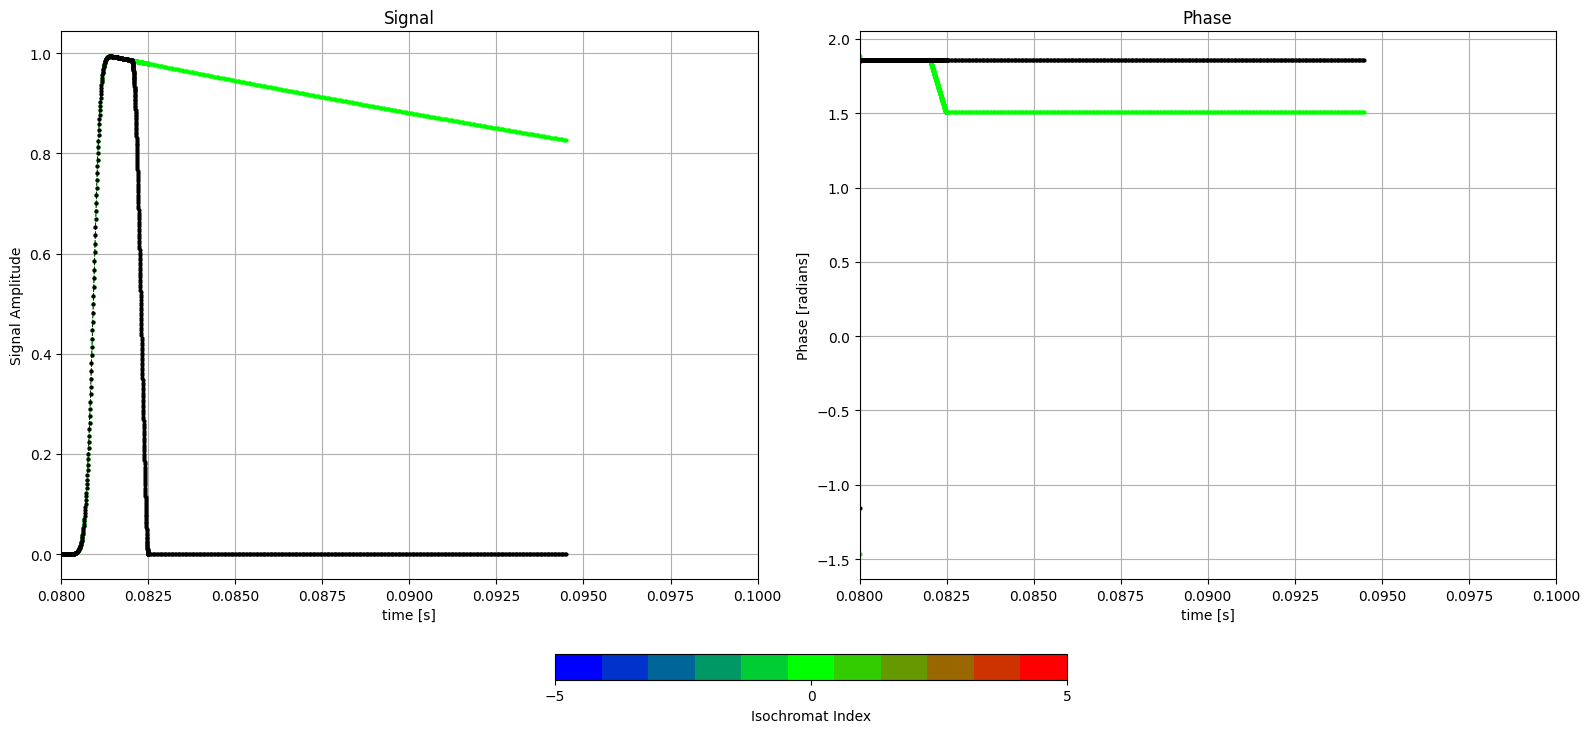

In [15]:
from bmc.utils.eval import plot_sim
time, m_z, m_z_total, m_c, m_c_total = sim_minus.get_mag(return_cest_pool=False)
time = time.cpu().numpy()
m_z = m_z.cpu().numpy()
m_z_total = m_z_total.cpu().numpy()
m_c = m_c.cpu().numpy()
m_c_total = m_c_total.cpu().numpy()

iso_select = [0]
plt_range = [0.0, 0.0353] #1ETM
# plt_range = [0.0675, 0.074] #5ETM
# plt_range = [0.0286, 0.0360]
# plt_range = [0.0675, 0.09]
# plt_range = [0.8275, 1.048] #wex
# plt_range = [0.08, 0.11]
plt_range = [0.08, 0.1]

# _ = plot_sim(m_out=[m_z, m_z_total], time=time, plt_range=plt_range, iso_select=iso_select)
_ = plot_sim(m_out=[m_c, m_c_total], time=time, plt_range=plt_range, iso_select=iso_select)

m_trans_minus = np.abs(m_c_total)[-900:]

In [16]:
x_rf = np.arange(0, 2e-3, 2e-3/300)
x_spoil = np.arange(2e-3,2.5e-3, 0.5e-3/300) #0.5ms spoil
# x_spoil = np.arange(2e-3,3e-3, 1e-3/300) #1ms spoil
# x_adc = np.arange(2.5e-3, 5.5e-3, 3e-3/300) #3ms adc
x_adc = np.arange(2.5e-3, 14.5e-3, 12e-3/300) #200ms adc
# x_adc = np.arange(3e-3, 6e-3, 3e-3/300) #3ms adc


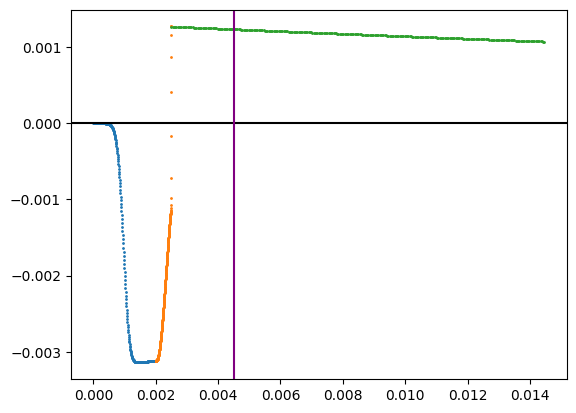

In [17]:
# plt.plot(x_spoil, (np.abs(m_trans_plus)-np.abs(m_trans_minus))[:300])
# plt.plot(x_adc, (np.abs(m_trans_plus)-np.abs(m_trans_minus))[300:])
plt.plot(x_rf,(m_trans_plus-m_trans_minus)[:300], 'o', markersize=1)
plt.plot(x_spoil,(m_trans_plus-m_trans_minus)[300:600], 'o', markersize=1)
plt.plot(x_adc,(m_trans_plus-m_trans_minus)[600:], 'o', markersize=1)
plt.axhline(0, c='black')
# plt.axhline(0.0055)
# plt.axvline(0.002476)

# plt.scatter(0.002476, 0.0055, c='b')

# plt.axhline(0.0295, color='r')
# plt.axvline(0.0025, color='r')

# plt.scatter(0.0025, 0.0295, c='r')

# plt.axhline(0.0006, color='g')
# plt.axvline(0.002482, color='g')

# plt.scatter(0.002475, 0.00026, c='g')

plt.axvline(0.0045, color='purple')
# plt.axvline(0.002485, color='purple')
# plt.scatter(0.002497, 0.000136, c='purple')

# plt.plot(x_rf,m_trans_plus[:300], 'o', markersize=1, c='b')
# plt.plot(x_spoil,m_trans_plus[300:600], 'o', markersize=1, c='b')
# plt.plot(x_adc,m_trans_plus[600:], 'o', markersize=1, c='b')

# plt.plot(x_rf,m_trans_minus[:300], 'o', markersize=1, c='r')
# plt.plot(x_spoil,m_trans_minus[300:600], 'o', markersize=1, c='r')
# plt.plot(x_adc,m_trans_minus[600:], 'o', markersize=1, c='r')

# plt.axvline(0.002449)

# plt.xlim(0.0024, 0.0026)
# plt.xlim(0.0023, 0.0025)
# plt.xlim(0.002, 0.006)
# plt.ylim(-0.02, 0.032)
# plt.ylim(-0.0002, 0.0002)
resulst = (m_trans_plus-m_trans_minus)

(0.0, 0.25)

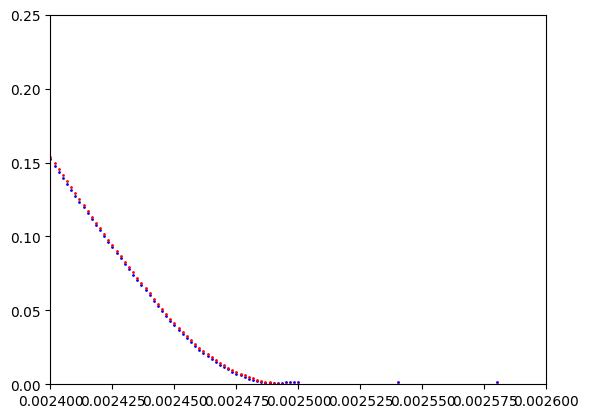

In [18]:
plt.plot(x_rf,m_trans_plus[:300], 'o', markersize=1, c='b')
plt.plot(x_spoil,m_trans_plus[300:600], 'o', markersize=1, c='b')
plt.plot(x_adc,m_trans_plus[600:], 'o', markersize=1, c='b')

plt.plot(x_rf,m_trans_minus[:300], 'o', markersize=1, c='r')
plt.plot(x_spoil,m_trans_minus[300:600], 'o', markersize=1, c='r')
plt.plot(x_adc,m_trans_minus[600:], 'o', markersize=1, c='r')
# plt.axhline(0, c='black')

plt.xlim(0.0024, 0.0026)
# plt.xlim(0.004, 0.0045)
plt.ylim(0, 0.25)

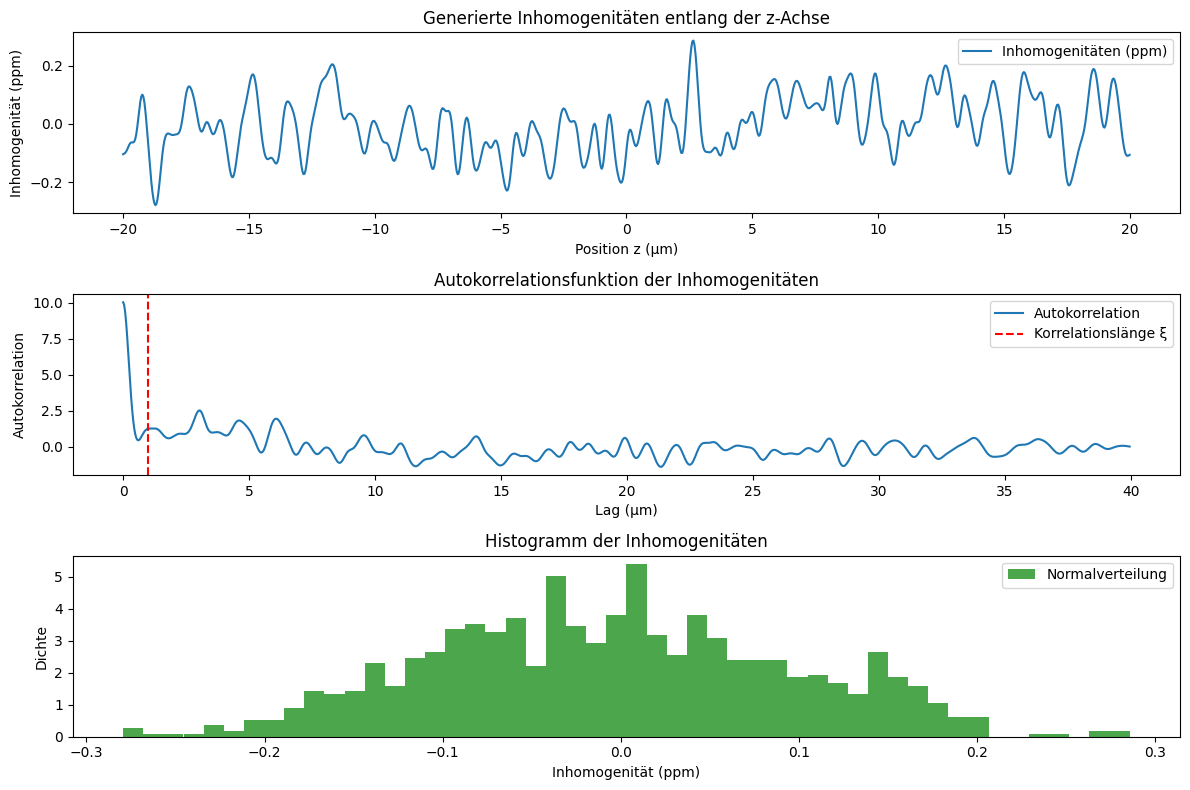

Beispiel-Inhomogenitäten (ppm): [-0.10465213 -0.10273174 -0.10000211 -0.09545558 -0.08874585 -0.08061804
 -0.07272985 -0.06690463 -0.06415783 -0.06397101]


In [19]:
import numpy as np
import matplotlib.pyplot as plt

def generate_gaussian_random_field_ppm(N, xi, sigma_ppm, L):
    """
    Generiert ein Gaussian Random Field mit räumlicher Korrelation in ppm.

    Parameter:
    - N: Anzahl der Isochromaten
    - xi: Korrelationslänge (in der gleichen räumlichen Einheit wie L, z.B. µm)
    - sigma_ppm: Standardabweichung der Inhomogenität in ppm
    - L: Gesamtlänge der z-Achse (z.B. in µm)

    Rückgabe:
    - field_ppm: Array mit Inhomogenitäten in ppm
    - z: Positionen der Isochromaten entlang der z-Achse
    """
    # Positionen der Isochromaten gleichmäßig verteilt
    z = np.linspace(-L/2, L/2, N)

    # Räumliche Auflösung
    dx = L / N  # Abstand zwischen Isochromaten

    # Wellenzahlen berechnen
    k = np.fft.fftfreq(N, d=dx)  # in 1/µm

    # Gaußsche Power Spectral Density (PSD)
    S_k = np.exp(-(k**2) * (xi**2))

    # Rausch im Fourier-Raum
    noise = np.random.normal(scale=1.0, size=N) + 1j * np.random.normal(scale=1.0, size=N)
    field_k = noise * np.sqrt(S_k)

    # Inverse FFT, um das räumliche Feld zu erhalten
    field_ppm = np.fft.ifft(field_k).real

    # Normalisieren auf die gewünschte Standardabweichung in ppm
    field_ppm = field_ppm / np.std(field_ppm) * sigma_ppm

    return field_ppm, z

# Parameter
N = 1000          # Anzahl der Isochromaten
xi = 1           # Korrelationslänge (z.B. in µm)
sigma_ppm = 0.1    # Standardabweichung der Inhomogenität in ppm
L = 40          # Gesamtlänge der z-Achse (z.B. in µm)

# Generiere Inhomogenitäten in ppm
inhomogenitäten_ppm, z = generate_gaussian_random_field_ppm(N, xi, sigma_ppm, L)

# Visualisierung
plt.figure(figsize=(12, 8))

# Plot der Inhomogenitäten
plt.subplot(3, 1, 1)
plt.plot(z, inhomogenitäten_ppm, label='Inhomogenitäten (ppm)')
plt.xlabel('Position z (µm)')
plt.ylabel('Inhomogenität (ppm)')
plt.title('Generierte Inhomogenitäten entlang der z-Achse')
plt.legend()

# Autokorrelationsfunktion zur Überprüfung der Korrelationslänge
def autocorrelation(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]

autocorr = autocorrelation(inhomogenitäten_ppm)
lags = np.arange(len(autocorr)) * (L / N)

plt.subplot(3, 1, 2)
plt.plot(lags, autocorr, label='Autokorrelation')
plt.axvline(x=xi, color='r', linestyle='--', label='Korrelationslänge ξ')
plt.xlabel('Lag (µm)')
plt.ylabel('Autokorrelation')
plt.title('Autokorrelationsfunktion der Inhomogenitäten')
plt.legend()

# Histogramm der Inhomogenitäten
plt.subplot(3, 1, 3)
plt.hist(inhomogenitäten_ppm, bins=50, density=True, alpha=0.7, color='g')
plt.xlabel('Inhomogenität (ppm)')
plt.ylabel('Dichte')
plt.title('Histogramm der Inhomogenitäten')
plt.legend(['Normalverteilung'])

plt.tight_layout()
plt.show()

# Beispielausgabe der Inhomogenitäten
print(f"Beispiel-Inhomogenitäten (ppm): {inhomogenitäten_ppm[:10]}")

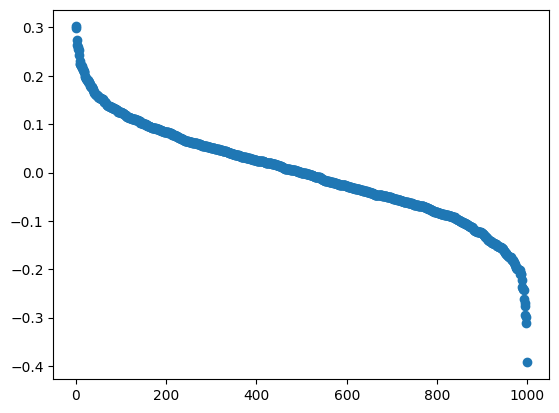

In [20]:
plt.plot(-np.sort(np.random.normal(0, 0.1, 1000)), 'o')

(-4.0, 10.0)

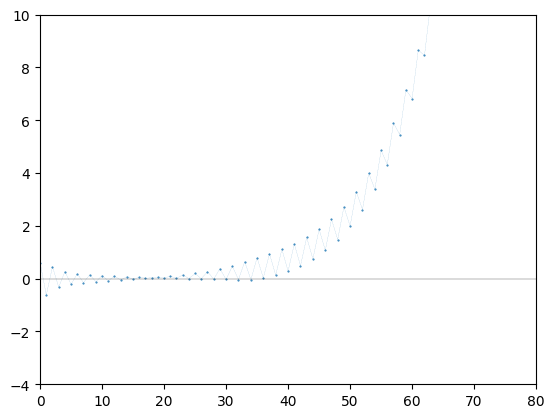

In [24]:
fig, ax = plt.subplots(dpi=100)
plt.plot(np.load('/Users/danielmiksch/JupyterLab/optim/bmc/optimize/pulse_optim.npy', allow_pickle=True), '--o', markersize=.5, linewidth=.1)
plt.axhline(0, linewidth=.2, c='black')
plt.xlim(0, 80)
plt.ylim(-4, 10)